In [1]:
# Author: Shiqi Jiang
# Last Modified: 1/29/2022

In [2]:
# Tryout on a collection of Sigmoid functions to simulate the Nearest Neighbour Distribution of empirical data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler

In [4]:
ER = np.genfromtxt(r"D:\file\Research\P-value\data\ATER")    # Generating array for empirical data from file.  ER has 499 data points
ERDD = np.genfromtxt(r"D:\file\Research\P-value\data\ATERDD") 
GEO = np.genfromtxt(r"D:\file\Research\P-value\data\ATGEO") 
GEOGD = np.genfromtxt(r"D:\file\Research\P-value\data\ATGEOGD") 
HGG = np.genfromtxt(r"D:\file\Research\P-value\data\ATHGG") 
SF = np.genfromtxt(r"D:\file\Research\P-value\data\ATSF") 
SFDD = np.genfromtxt(r"D:\file\Research\P-value\data\ATSFDD") 
Sticky = np.genfromtxt(r"D:\file\Research\P-value\data\ATSticky") 

In [36]:
print(ER)
print(ER.shape)

[[3.52230e+04 2.58905e+05 6.40000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [3.49270e+04 2.55662e+05 5.60000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [3.49670e+04 2.56552e+05 6.50000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [3.54940e+04 2.64069e+05 6.40000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [3.48520e+04 2.55494e+05 6.90000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [3.49750e+04 2.56733e+05 6.00000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
(499, 30)


In [37]:
print(np.sqrt(np.sum(ER-ER[0])**2))

179118216.0


In [55]:
# useless
a = np.array([[1,2,3,4,5],[3,4,5,6,7]])
b = np.array([1,1,1,1,1])
print(a-b)
x= (a-b)**2
print(x)
print(np.sqrt(np.sum(x,axis=1)))


[[0 1 2 3 4]
 [2 3 4 5 6]]
[[ 0  1  4  9 16]
 [ 4  9 16 25 36]]
[5.47722558 9.48683298]


In [58]:
# calculating empirical data's shortest(NN) distance 
# real data is high-dimensional data points

# Revised Version. Now output correct data distance
def data_distance(data):
    shortest_distance = [0]*len(data)
    for i in range(len(data)):
        x = np.delete(data,i,0)
        temp = (x-data[i])**2
        d = np.sqrt(np.sum(temp,axis=1))
        shortest_distance[i] = d.min()
    
    return np.array(shortest_distance)   # return an array of real data's NN distance

# plotting empirical data's NN hist
def plot_data_distance(D, title):
    """
    D: an array of real data' NN distance
    """
    f, ax = plt.subplots(1,1, figsize = (8,6))
    ax.hist(D,edgecolor='white',bins=50)   ## consider specifying <bins>
    ax.set_title(title)
    plt.show()
    return

In [59]:
print(data_distance(ER))

[  8999.52144561   6158.54284714   3258.32242112  13122.18199272
   6993.28243745  11426.66741662   5383.59259696   6032.82440073
   6554.14237334   4791.14707038   5904.17005175   5685.10070271
   5761.70026989   5640.78649215   8354.17033583  10902.29521706
   8838.41033501  11943.63848457  12227.93077344  10576.60286907
   8494.65462806   6643.1490462   37404.63342956  39665.25061058
   8670.93662761   7945.48733559   6331.90232079   8826.07789451
  13097.99961826  11928.89890141   7436.52412085   6327.93489221
   9118.64644561   7567.42010199   4248.01768476   6032.82440073
   6880.85801336   8986.82624735   2841.94757165   5853.86635054
   8114.5208731    8838.41033501   8131.44132365   7471.38877653
   5353.9940465    8175.73625125   6864.62023713   6200.43764584
   6278.7461527   11081.7912812    4444.06663429   6425.30172443
   6799.74545479   8425.37478395   5314.59596301   2841.94757165
   7228.31800974   8047.73452594   2623.84088694   6300.36332286
   8428.21637418   8551.3

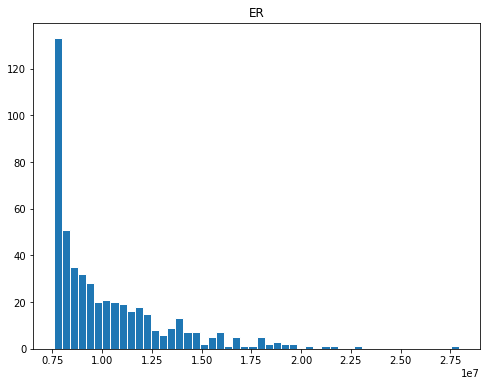

In [34]:
empirical_NN = data_distance(ER)
plot_data_distance(empirical_NN,"ER")

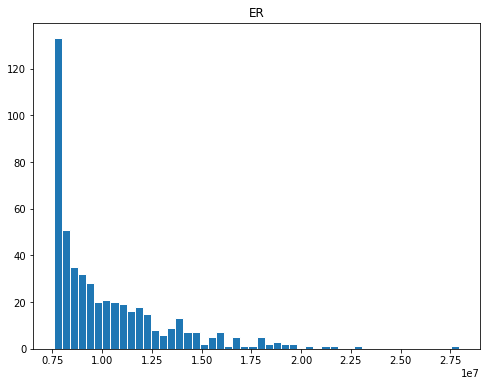

(500,)
(499,)


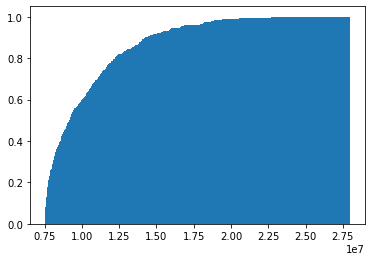

In [6]:
empirical_NN = data_distance(ER)
plot_data_distance(empirical_NN,"ER")
h = plt.hist(empirical_NN,bins=499,density=True,cumulative=True)
x = h[1]
y = h[0]
print(x.shape)
print(y.shape)

In [7]:
print(np.median(empirical_NN))

9165762.002575917


In [8]:
# plot CDF of empirical data
def plot_empirical_CDF(data, Density,title):
    f, ax = plt.subplots(1,1,figsize=(6,4))
    h = ax.hist(data,bins=len(data),density=Density,cumulative=True,histtype='stepfilled')    # bins set to equal to # of empirical data
    x = h[1][:-1]
    y = h[0]
    ax.plot(x,y,color='k', label='Empirical')
    ax.set_title(title)
    ax.legend()
    plt.show()
    return x,y

In [9]:
# plot CDF of empirical data + fitted Sigmoid
def plot_sigmoid(data,Density, func, param):
    f, ax = plt.subplots(1,1,figsize=(10,8))
    h = ax.hist(data,bins=499,density=Density,edgecolor='white',cumulative=True,histtype='step')
    x = h[1][:-1]
    y = h[0]

    y2 = func(x/1e7,*param)    # by func curve_fit
    #ax.plot(x,y,color='k', label='Empirical')
    #ax.plot(x,y2,color='r',label='sigmoid')
    ax.set_yscale('log')
    #ax.plot(x[:-100],1-y[:-100],color='g',label='1-empirical')
    ax.scatter(x,1-y,color='g',label='1-empirical')
    ax.plot(x,1-y2,color='y',label='1-sigmoid')
    ax.legend(loc='upper left')
    plt.show()
    return x,y,y2

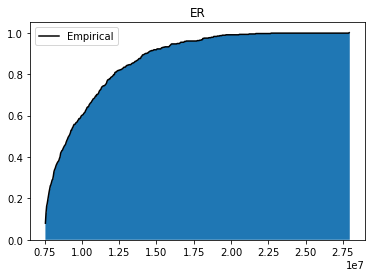

In [10]:
# plot empirical CDF
x,y = plot_empirical_CDF(empirical_NN, True, "ER")

In [11]:
# empirical_NN start and end
print(x[0],x[-1])

7561299.601992339 27918532.02121464


[0.93944918 4.83991347]


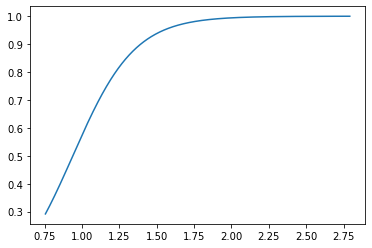

In [17]:
# Curve_fit
p0 = [np.median(empirical_NN)/1e7,1] # this is initial guess for curve_fit()

popt, pcov = curve_fit(f=logistic, xdata=x/1e7, ydata=y, p0=p0,method='lm')

# parameters yielded by Curve_fit: x0, k , b
print(popt)

y2 = logistic(x/1e7, *popt)
plt.plot(x/1e7,y2)
plt.show()

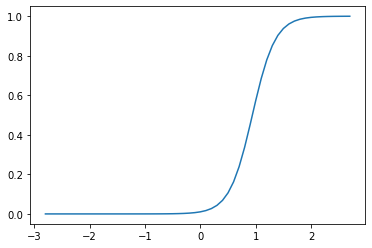

In [18]:
x3 = np.arange(-2.8,2.8,0.1)
y3 = logistic(x3,*popt)
plt.plot(x3,y3)
plt.show()

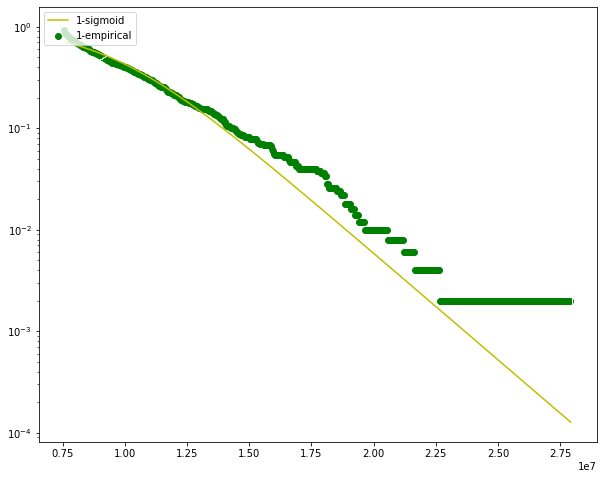

In [19]:
# plot fitted sigmoid
# by Curve_fit
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=popt) 

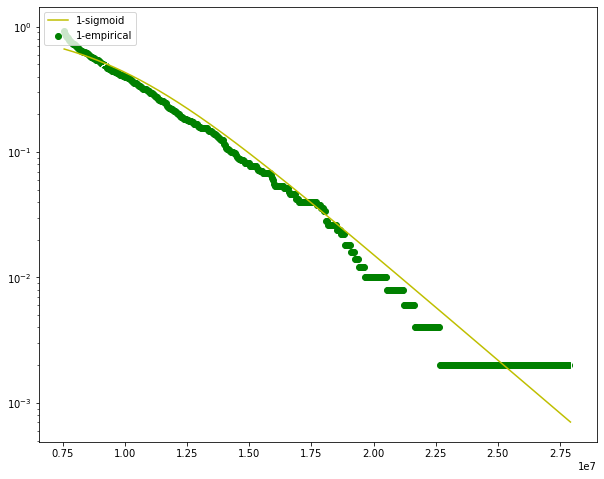

1.0000000000000007 0.999296696720741


In [20]:
# plot fitted sigmoid
# change growth rate k by hand
# param = [x0, k ,b]
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=[0.93056633,3.9])
print(y[-1],y2[-1])

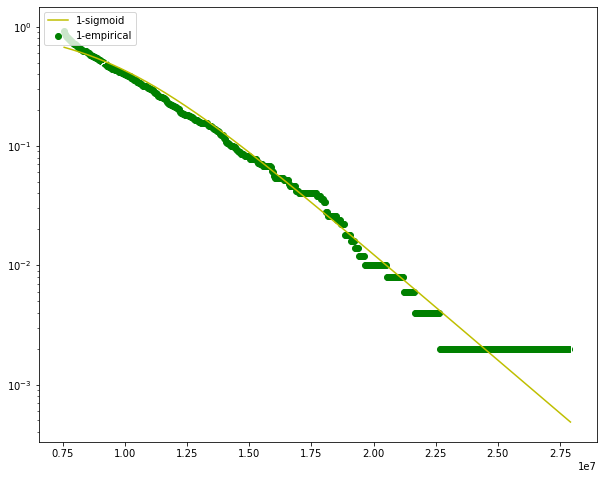

1.0000000000000007 0.999515193686098


In [21]:
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=[0.93056633,4.1])
print(y[-1],y2[-1])

In [22]:
# head y-value
print(x[0],y[0],y2[0],x[-1])

7561299.601992339 0.08016032064128256 0.32845325074095105 27918532.02121464


In [23]:
# tail y-value
print(y[-1],y2[-1])

1.0000000000000007 0.999515193686098


In [24]:
def MSE(y,y2):
    return np.mean((y2-y)**2)

In [25]:
print(MSE(y,y2))

0.0007917630964079864


## all AT in one figure (empirical + sigmoid for each at-)
## 1.23

In [26]:
data_list = [ER,ERDD,GEO,GEOGD,HGG,SF,SFDD,Sticky]      # all read-in empirical AT data
data_name = ['ER','ERDD','GEO','GEOGD','HGG','SF','SFDD','Sticky']

In [13]:
def logistic(x,x0, k):
    m = (1/ (1 + np.exp(-k*(x-x0))))       # b to better fit left end since it does not reach 0
    return m

In [14]:
# Curve_fit 2.0: function 

def auto_curve_fit(data_NN, x, y, x_scale_factor, func):
    p0 = [np.median(data_NN)/x_scale_factor,1] # this is initial guess for curve_fit()

    popt, pcov = curve_fit(f=func, xdata=x/x_scale_factor, ydata=y, p0=p0,method='lm')

    # parameters yielded by Curve_fit: x0, k
    print(popt)
    return popt

In [15]:
# 2.0:  Plot 1-empirical_CDF and 1-sigmoid
def plot_pair(x, y, x_scale_factor, func, param, name, color):
    '''
    x,y: empirical_NN and probability value
    x_scale_factor: scaling factor observed to avoid func overflowing
    func: sigmoid function
    param: parameters generated by Curve_fit()
    '''
    f,ax = plt.subplots(1,1,figsize=(10,8))
    y2 = func(x/x_scale_factor, *param)
    
    ax.set_yscale('log')
    
    ax.scatter(x,1-y, color=color,marker='.')
    ax.plot(x,1-y2, color=color, label=name)
    ax.legend(loc='upper left')
    plt.show()
    

In [16]:
def sigmoid_preview(x,x_scale_factor,popt,name):
    y2 = logistic(x/x_scale_factor, *popt)
    plt.plot(x/x_scale_factor,y2)
    plt.title(name)
    plt.show()

In [27]:
factor = [1e7,1e10,1e6,1e9,1e15,1e10,1e11,1e11]
colors = ['b','g','r','c','m','y','k','brown']

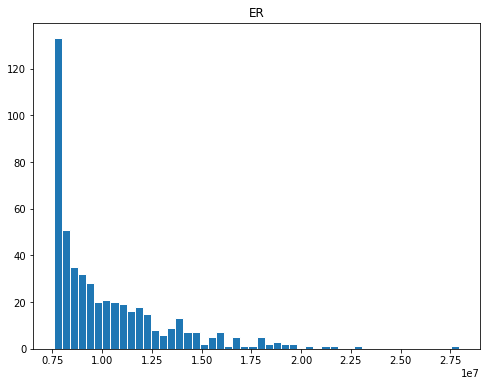

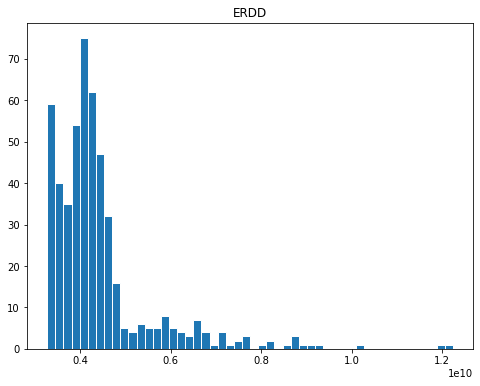

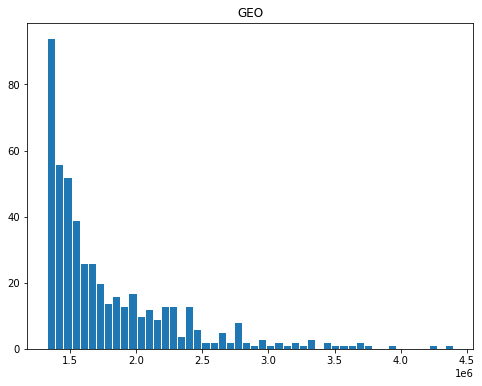

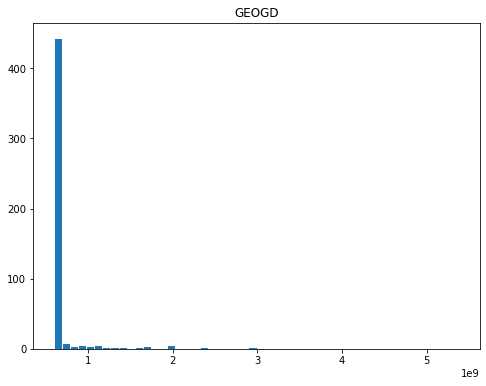

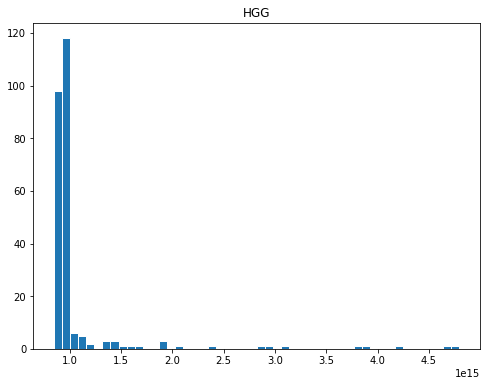

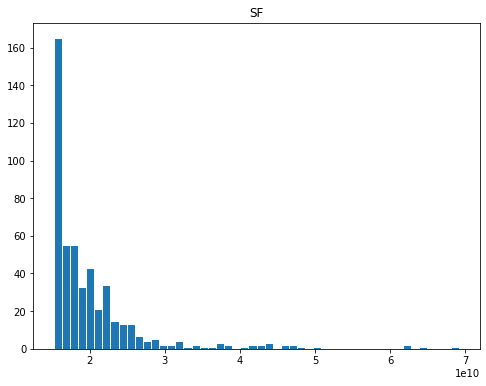

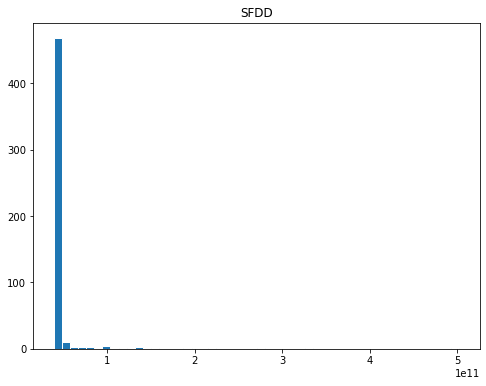

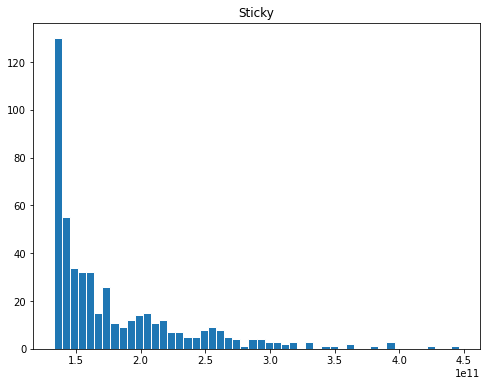

In [28]:
# empirical NN
for i in range(8):
    NN = data_distance(data_list[i])
    plot_data_distance(NN,data_name[i])

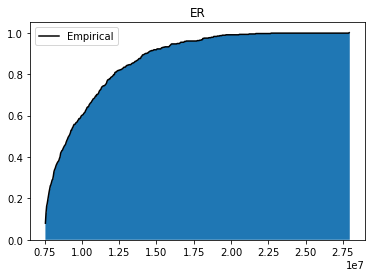

[0.93944918 4.83991347]


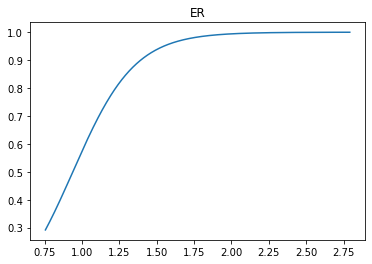

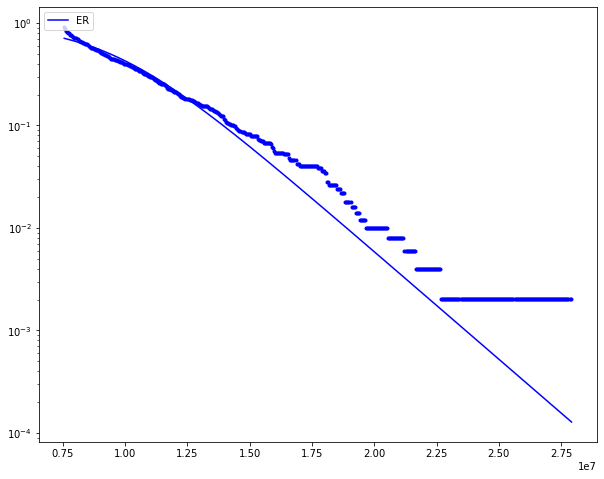

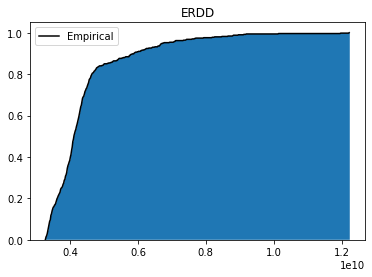

[ 0.41717673 22.5246867 ]


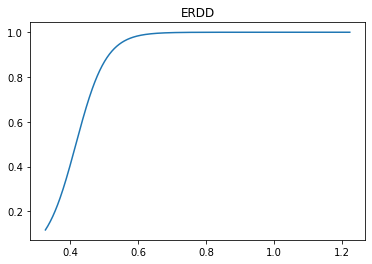

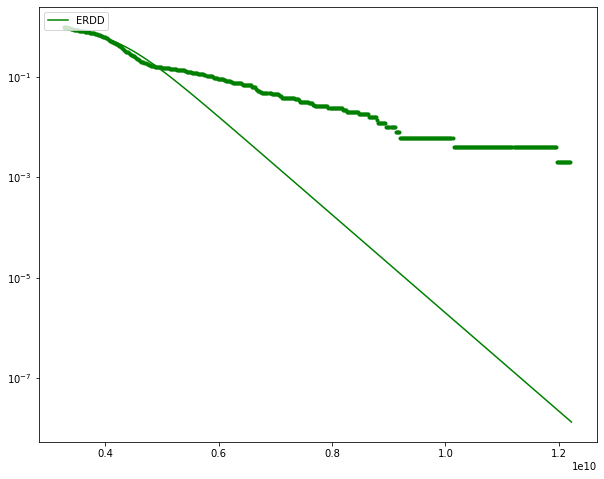

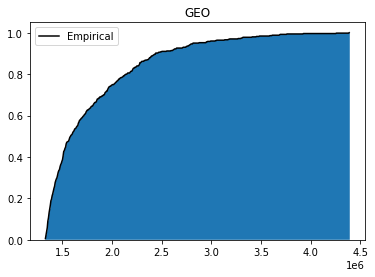

[1.65799787 3.04806411]


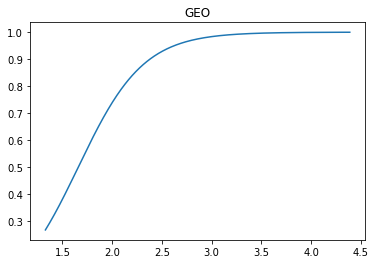

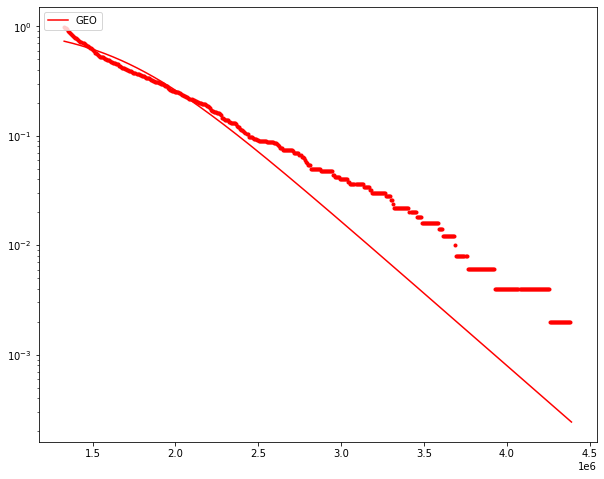

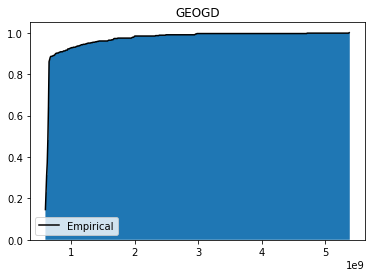

[ 0.62782689 45.59178322]


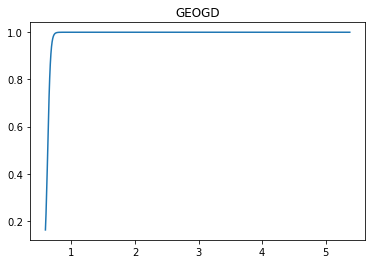

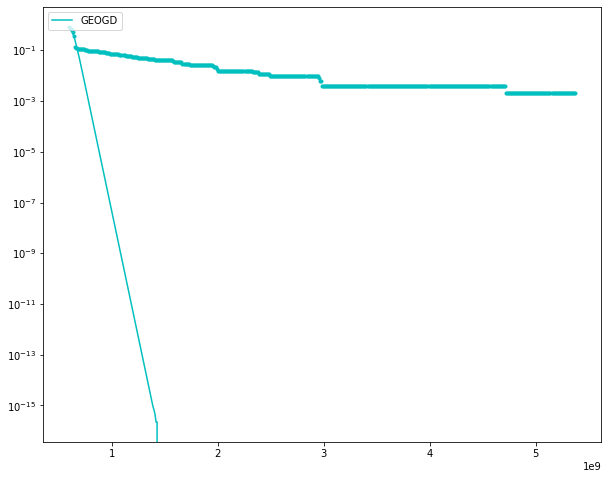

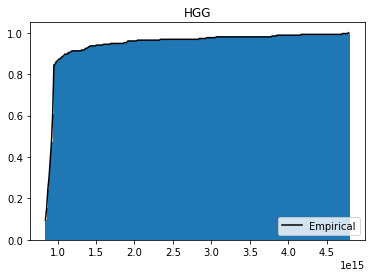

[ 0.91962451 25.00362412]


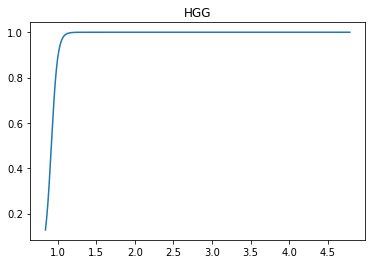

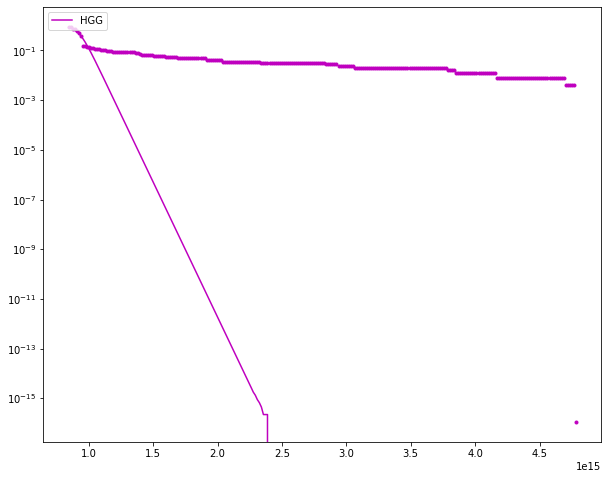

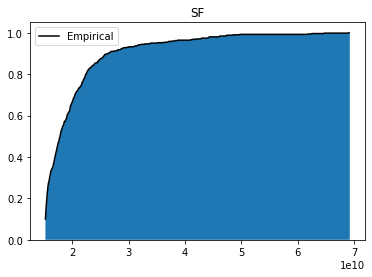

[1.81286983 2.92042994]


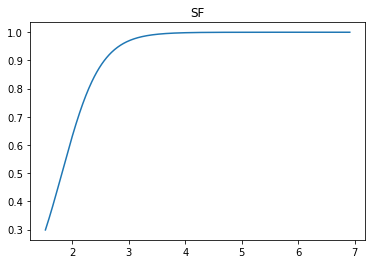

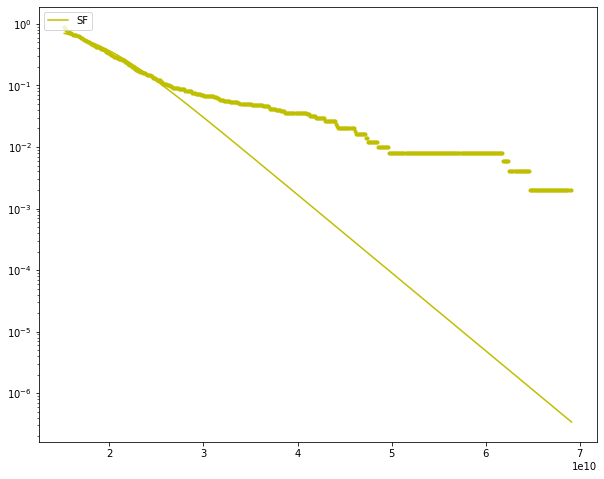

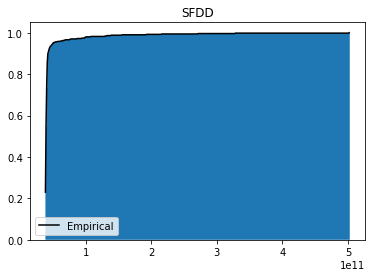

[ 0.39331208 92.60078611]


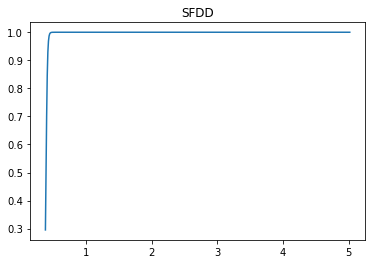

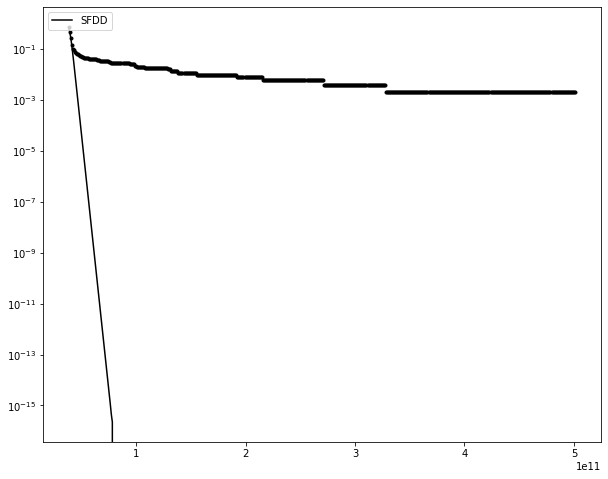

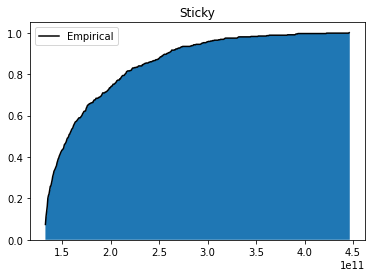

[1.61275482 2.56906507]


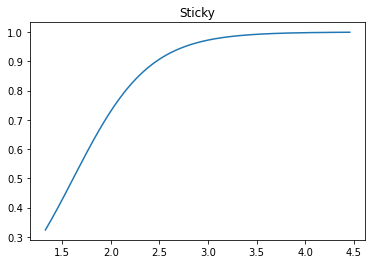

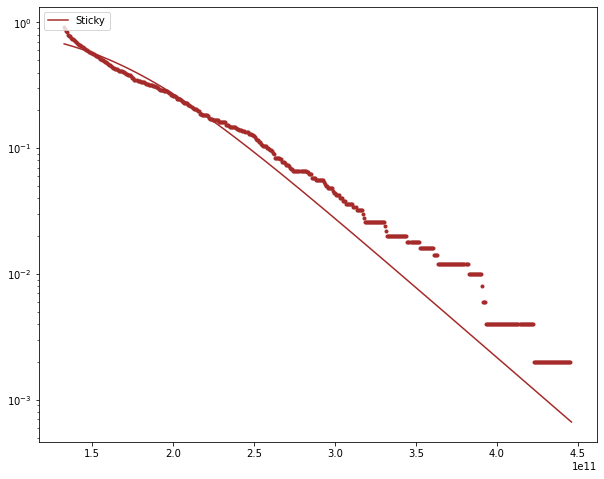

In [29]:
# empirical NN for each species
x_s = [0]*8
y_s = [0]*8
popt_s = [0]*8

for i in range(len(data_list)):
    NN_i = data_distance(data_list[i])
    x_s[i],y_s[i] = plot_empirical_CDF(NN_i,True,data_name[i])
    popt_s[i] = auto_curve_fit(NN_i, x_s[i], y_s[i], factor[i],logistic)
    sigmoid_preview(x_s[i],factor[i],popt_s[i],data_name[i])
    plot_pair(x_s[i],y_s[i],factor[i],logistic,popt_s[i],data_name[i],colors[i])    

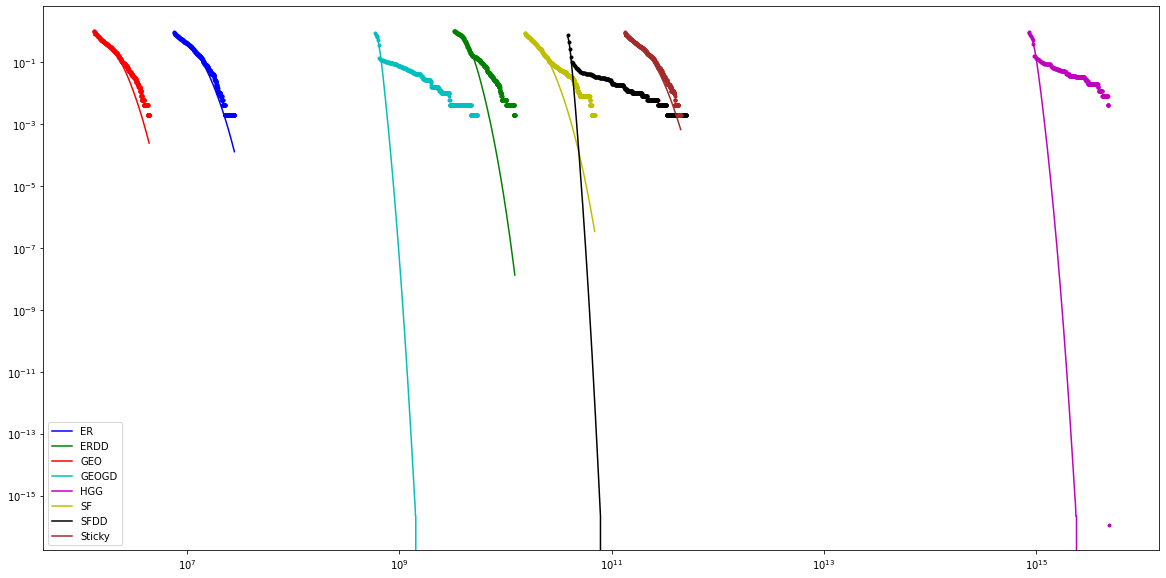

In [30]:
f,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_yscale('log')
ax.set_xscale('log')
for j in range(8):
    y2 = logistic(x_s[j]/factor[j],*popt_s[j])
    ax.scatter(x_s[j],1-y_s[j],color=colors[j],marker='.')
    ax.plot(x_s[j],1-y2, color=colors[j],label=data_name[j])
ax.legend(loc='lower left')
plt.show()